In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
#checking info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
#delete missing values
data.dropna(axis=0, inplace=True)

In [6]:
#checking for duplicate values
dup_data=data.duplicated().any()

In [7]:
print("any duplicate values are there or not?",dup_data)

any duplicate values are there or not? False


In [8]:
#Which year recorded the highest average voting?
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [10]:
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

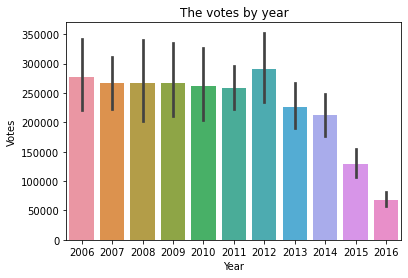

In [12]:
sns.barplot(x='Year', y='Votes', data=data)
plt.title("The votes by year")
plt.show()

In [13]:
#The top 10 movies interms of runtime
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [18]:
top10moviesbyruntime=data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]\
.set_index('Title')

In [19]:
top10moviesbyruntime

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Title'>

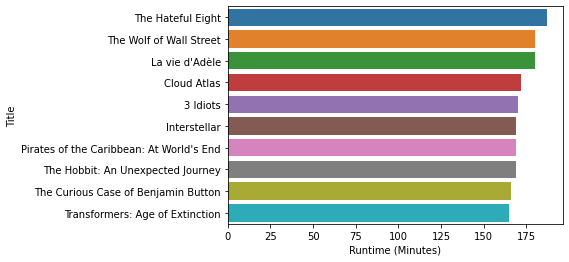

In [21]:
sns.barplot(x='Runtime (Minutes)',y=top10moviesbyruntime.index,data=top10moviesbyruntime)

In [22]:
#To display the number of movies per year
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [23]:
data['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2010     57
2011     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

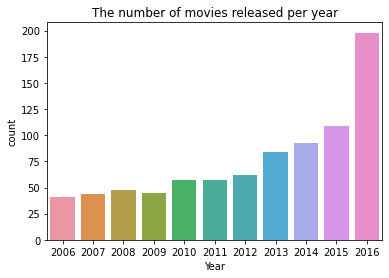

In [25]:
sns.countplot(x='Year',data=data)
plt.title("The number of movies released per year")
plt.show()